# Day 03 – Seaborn

---

## ◙ Topics Covered
- Seaborn

---

## ‣ Problem 1: Real-World Everyday-Use Problem

**Problem Statement:**
A retail company is analyzing customer purchase data to understand spending patterns across different customer segments. The company has data on customer demographics (e.g., age, location) and purchase history (e.g., total amount spent per transaction). They want to visualize this data to identify key trends and inform marketing strategies.

**Input ➤**

A dataset containing customer information with the following columns:

-CustomerID (unique identifier)

-Age (numerical)

-Location (categorical: "Urban","Suburban", "Rural")

-Total_Spent (numerical: total amount spent per transaction)

**Output ➤**

- Create visualizations to show the distribution of Total_Spent for each Location.
- Create visualizations to analyze the relationship between Age and Total_Spent.
- State 2 insights you derived from the visualizations.

**Code ➤**

  CustomerID  Age  Location  Total_Spent
0    CUST001   56     Rural       636.61
1    CUST002   46     Urban       631.07
2    CUST003   32     Rural        56.71
3    CUST004   60  Suburban        71.91
4    CUST005   25     Urban       548.54
5    CUST006   38  Suburban       429.87
6    CUST007   56  Suburban        94.33
7    CUST008   36  Suburban       975.07
8    CUST009   40  Suburban       271.13
9    CUST010   28     Urban       136.08





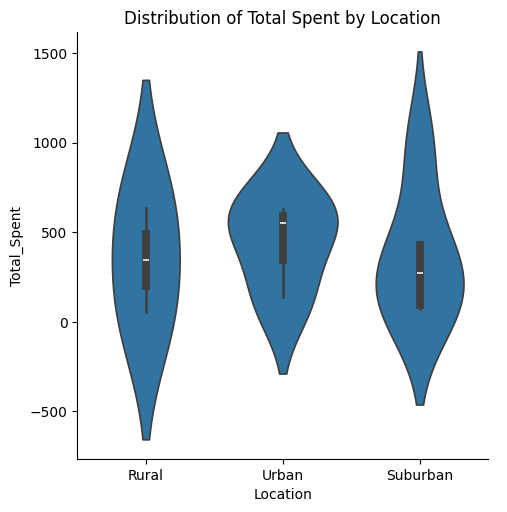

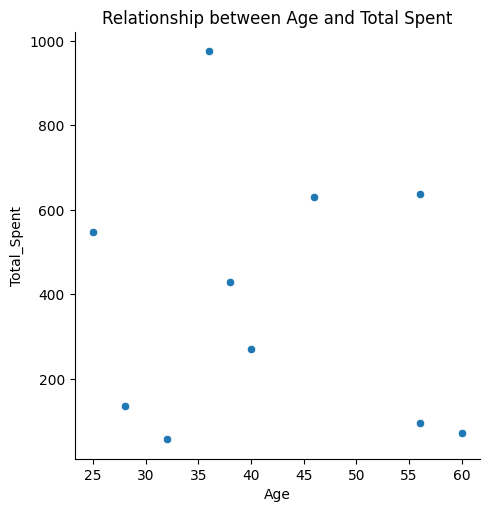

In [38]:
#creating dataset
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Create sample dataset
num_rows = 10

data = {
    "CustomerID": [f"CUST{i:03d}" for i in range(1, num_rows + 1)],
    "Age": np.random.randint(18, 65, size=num_rows),
    "Location": np.random.choice(["Urban", "Suburban", "Rural"], size=num_rows),
    "Total_Spent": np.round(np.random.uniform(50.0, 1000.0, size=num_rows), 2)
}

df = pd.DataFrame(data)
print(df)

print("\n\n")


#1.Create visualizations to show the distribution of Total_Spent for each Location.

import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='Location',y='Total_Spent',data=df,kind='violin')
plt.title("Distribution of Total Spent by Location")
plt.show()
print("\n\n")


#2.Create visualizations to analyze the relationship between Age and Total_Spent.
sns.relplot(x="Age",y="Total_Spent",kind="scatter",data=df)
plt.title("Relationship between Age and Total Spent")
plt.show()



#3.State 2 insights you derived from the visualizations.
  # 1.The distribution of Total_Spent varies across locations. The violin plot suggests that the median spending is highest in the Urban area, indicating that, on average, urban customers tend to spend more. Both Suburban and Rural areas show a wider spread of spending, with the presence of outliers indicating some high-value transactions, although the majority of transactions are lower than in the Urban area.

  # 2.The scatter plot reveals a weak to moderate positive relationship between Age and Total_Spent. There appears to be a trend of increased spending in the middle age range (roughly 30 to 50 years), but there's also significant variability, with older and younger individuals showing a wide range of spending amounts. It's important to note that this is a small sample, and a more robust analysis with a larger dataset would be needed to confirm this trend.




---

## ‣ Problem 2: Difficult Problem

**Problem Statement:**
An e-commerce platform is trying to optimize its website layout to maximize user engagement. They have collected data on user interactions, including the time spent on different pages and the number of clicks on specific elements. They want to understand how user engagement varies across different age groups.



**Input ➤**

A dataset containing user interaction data:

- UserID (unique identifier)
- Age (numerical)
- Page_Name (categorical: e.g., "Homepage", "ProductPage", "Cart")
- Time_Spent (numerical: time spent on the page in seconds)
- Clicks (numerical: number of clicks on elements within the page)

**Output ➤**

- Choose appropriate visualizations to represent the distribution of Time_Spent on the "ProductPage" for different Age groups. Explain why you chose those visualizations.
- Discuss the advantages and disadvantages of using a box plot versus a violin plot to visualize this data.
- Explain how you would visualize the relationship between Age and Clicks on the "Cart" page.

**Code ➤**

     UserID  Age    Page_Name  Time_Spent  Clicks
0   USER001   55         Cart      234.62      17
1   USER002   30  ProductPage      216.21      11
2   USER003   26         Cart      241.81      12
3   USER004   27     Homepage       32.38      16
4   USER005   29     Homepage      157.86      13
5   USER006   23         Cart      260.18      19
6   USER007   33     Homepage      249.60       9
7   USER008   18  ProductPage      249.73      18
8   USER009   34         Cart       85.55      15
9   USER010   19         Cart       22.48       0
10  USER011   30     Homepage      202.81       4
11  USER012   25  ProductPage      179.95      15
12  USER013   24  ProductPage      203.14       2
13  USER014   43         Cart      126.48       7
14  USER015   38     Homepage       63.28       8





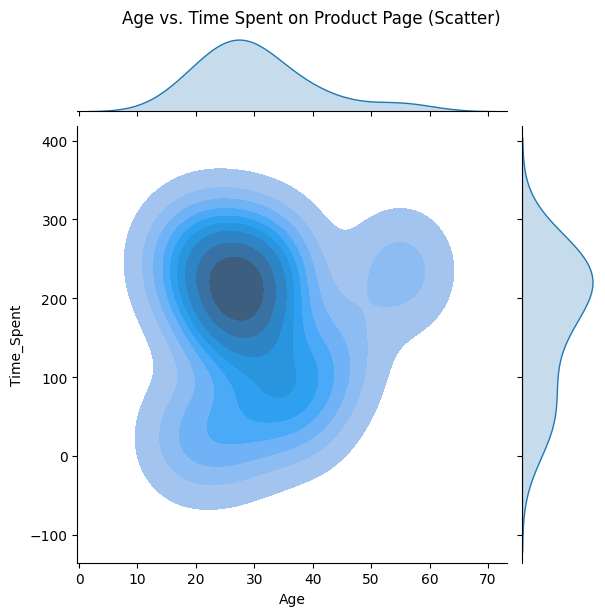

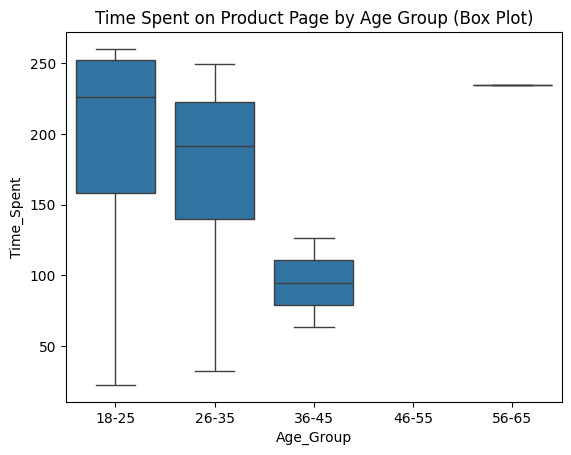

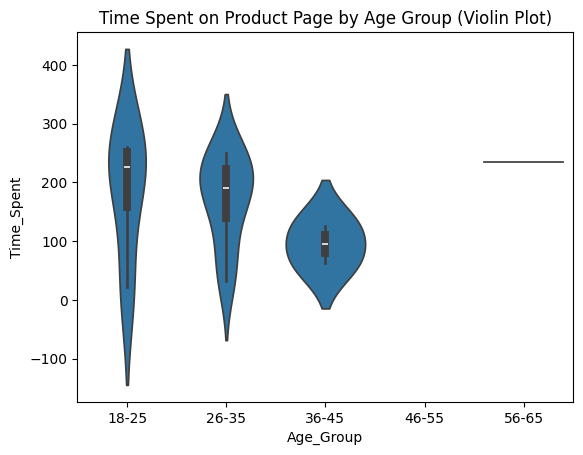

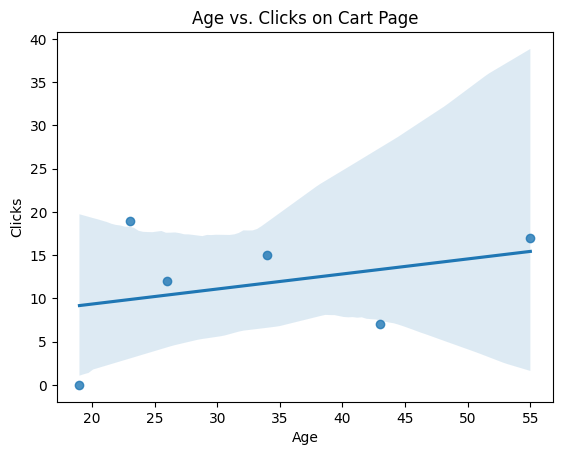

In [45]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(1)

# Number of sample rows
num_rows = 15

# Create synthetic data
data = {
    "UserID": [f"USER{i:03d}" for i in range(1, num_rows + 1)],
    "Age": np.random.randint(18, 60, size=num_rows),
    "Page_Name": np.random.choice(["Homepage", "ProductPage", "Cart"], size=num_rows),
    "Time_Spent": np.round(np.random.uniform(5, 300, size=num_rows), 2),  # seconds
    "Clicks": np.random.randint(0, 20, size=num_rows)
}

# Create DataFrame
df = pd.DataFrame(data)

print(df)

# 1.Choose appropriate visualizations to represent the distribution of Time_Spent on the "ProductPage" for different Age groups. Explain why you chose those visualizations.
print("\n\n")

#choosing the product page
product=df[df['Page_Name']=="ProductPage"]

# making graphs
sns.jointplot(data=df, x='Age', y='Time_Spent', fill=True,kind="kde")
plt.suptitle("Age vs. Time Spent on Product Page (Scatter)", y=1.02)
plt.show()
# why -> becox it is providing the distribution for both the columns

print("\n\n")
#2.Discuss the advantages and disadvantages of using a box plot versus a violin plot to visualize this data.
# Step 1: Create Age Groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


sns.boxplot(data=df, x='Age_Group', y='Time_Spent')
plt.title("Time Spent on Product Page by Age Group (Box Plot)")
plt.show()
print("\n")
sns.violinplot(data=df, x='Age_Group', y='Time_Spent')
plt.title("Time Spent on Product Page by Age Group (Violin Plot)")
plt.show()
# Violin plot is more suitable because it shows the distribution of data for the categorical variable over numerical variable.


print("\n\n")
# 3. Explain how you would visualize the relationship between Age and Clicks on the "Cart" page.
# selecting the cart page
cart=df[df['Page_Name']=="Cart"]
# visulize
print("\n\n")
sns.regplot(x="Age",y='Clicks',data=cart)
plt.title("Age vs. Clicks on Cart Page")
plt.show()

---